<img src='Image/CBG18.png' width="220px" align="right"> <img src='Image/uff-logo.png' width="200px" align="left"> <img src='Image/logon.jpg' width="200px" align="center"> 

## <center> Synthetic data - Dike model <center> 

--------------------------------------------------------------------------------------------------------------------

In [1]:
################ python internal packages ###############
import numpy as np
import pylab as py
import pandas as pd
from scipy.interpolate import griddata
from scipy import stats
import pandas as pd
from matplotlib import widgets
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import matplotlib.pyplot as plt
from IPython.display import Latex
#########################################################

In [2]:
################### import external packages #################
from modules.sphere import sphere_gz
from modules.plots import rectangle, draw_prism
##############################################################

# <center> Step # 01: Read synthetic data and the dike model info <center>

In [3]:
# read synthetic data file using pandas package:
data = pd.read_csv('Synthetic/synthetic_data.txt', sep = ' ')
print data
# read dike file using pandas package (dike info is just for ploting issues!):
dike = pd.read_csv('Synthetic/dike_model.txt', sep = ' ')
print dike

             X(m)    Y(m)  elev(m)  gz(mgal)
0    -5000.000000 -5000.0   -500.0  0.932549
1    -4898.989899 -5000.0   -500.0  1.161338
2    -4797.979798 -5000.0   -500.0  1.323244
3    -4696.969697 -5000.0   -500.0  0.917604
4    -4595.959596 -5000.0   -500.0  1.014856
5    -4494.949495 -5000.0   -500.0  1.248768
6    -4393.939394 -5000.0   -500.0  1.192921
7    -4292.929293 -5000.0   -500.0  1.017305
8    -4191.919192 -5000.0   -500.0  1.147439
9    -4090.909091 -5000.0   -500.0  1.038656
10   -3989.898990 -5000.0   -500.0  1.166494
11   -3888.888889 -5000.0   -500.0  1.034909
12   -3787.878788 -5000.0   -500.0  1.127178
13   -3686.868687 -5000.0   -500.0  1.194580
14   -3585.858586 -5000.0   -500.0  1.241087
15   -3484.848485 -5000.0   -500.0  1.066869
16   -3383.838384 -5000.0   -500.0  1.207100
17   -3282.828283 -5000.0   -500.0  1.257498
18   -3181.818182 -5000.0   -500.0  1.282457
19   -3080.808081 -5000.0   -500.0  1.312408
20   -2979.797980 -5000.0   -500.0  1.450967
21   -2878

#  <center size=3> Some useful tools of pandas: <center>


In [ ]:
data.min() # minimum values per column

In [ ]:
data.max() # maximum values per column

In [ ]:
data.sum() # sum values per column

In [ ]:
data.abs() # abs values per column

In [ ]:
data.diff() # diference values of each line

In [ ]:
data.count() # number of lines of each column

In [ ]:
data.mean() # mean of each column

In [ ]:
data.median() # median of each column

# Interpolate your data for map visualization.  This is for a non-gridded data, which is really a common situation !

In [4]:
# set the mesh limits from real data coordinates with pandas command presented above:
xmin = data.min()[0]
print 'min x coordinate =', xmin
ymin = data.min()[1]
print 'min y coordinate =', ymin
xmax = data.max()[0]
print 'max x coordinate =', xmax
ymax = data.max()[1]
print 'max y coordinate =', ymax

# define the number of data in both x and y directions: 
nx = 100 
ny = 100 

# create a linspace for x coordinates:
x = np.linspace(xmin, xmax, nx, endpoint=True)
# and also for y coordinates:
y = np.linspace(ymin, ymax, ny, endpoint=True)
# mesh for interpolation:
X,Y = np.meshgrid(x,y)

min x coordinate = -5000.0
min y coordinate = -5000.0
max x coordinate = 5000.0
max y coordinate = 5000.0


# <center size=3>   Interpolation using scipy package : <center> 

In [5]:
# put the read data into more mnemonic variables and convert to lists to perform calculations:
coordx = data.iloc[:,0] # x coordinate (m)
coordy = data.iloc[:,1] # y coordinate (m)
elev   = data.iloc[:,2] # elevation (m) - in this case, is one elevation for the whole data-set! pay attention!
gz     = data.iloc[:,3] # vertical attraction (mGal) 

real_coords = (coordx, coordy) # real observation positions
grid_coords = (X,Y) # interpolated observation positions

# function of scipy for interpolation:
gzi = griddata(real_coords, gz, grid_coords , method='cubic') # from now on, this will be our "real data"

# <center size=3>   Visualization of the interpolated data and the contour of the dike : <center> 

In [6]:
# contour of the dike using pandas commands:
xmin_dike = dike.iloc[0,0]
xmax_dike = dike.iloc[0,1]
ymin_dike = dike.iloc[0,2]
ymax_dike = dike.iloc[0,3]
zmin_dike = dike.iloc[0,4]
zmax_dike = dike.iloc[0,5]

# create a list with the contour of the dike (IN THIS CASE, THE REAL SOURCE!)
contour_dike = [xmin_dike, xmax_dike, ymin_dike, ymax_dike]

# coordinates of the dike for 3D plot:
dike3D = [xmin_dike, xmax_dike, ymin_dike, ymax_dike, zmin_dike, zmax_dike]

print 'Horizontal limits of the dike = ', contour_dike
print 'Coordinates of the dike = ', dike3D

Horizontal limits of the dike =  [-1000.0, 1000.0, -500.0, 500.0]
Coordinates of the dike =  [-1000.0, 1000.0, -500.0, 500.0, 500.0, 3000.0]


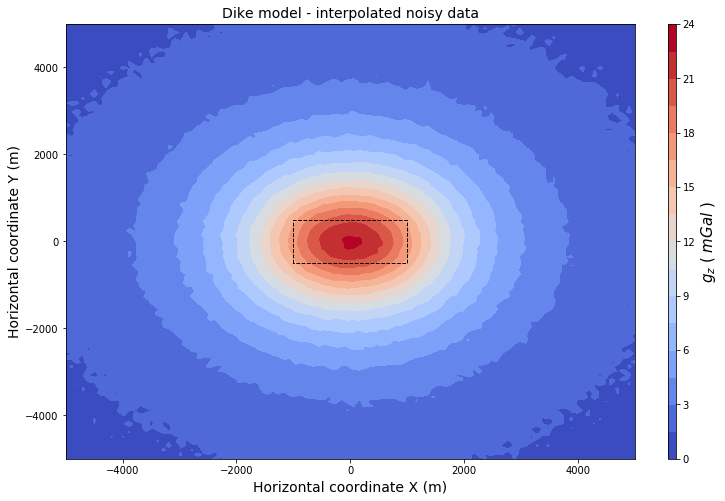

In [7]:
# Ploting the data to see if it's ok so far:
plt.close('all')
fig = plt.figure(figsize=(12,8))
fs = 14 # fontsize used in the labels

# draw the edges of the dike for better vizualization:
rectangle(contour_dike, style='--k', linewidth=1, fill=None, alpha=1., label=None)

# plot the data in countor map:
plt.title('Dike model - interpolated noisy data', fontsize = fs)
p = plt.contourf(X, Y, gzi, 20, cmap = plt.cm.coolwarm, vmin = np.min(gz), vmax = np.max(gz))
cbar = fig.colorbar(p, aspect=60, fraction = 0.1, orientation="vertical")
cbar.set_label('$g_z$ ( $ mGal$ )',fontsize=15, rotation = 90)
plt.ylabel('Horizontal coordinate Y (m)', fontsize = fs)
plt.xlabel('Horizontal coordinate X (m)', fontsize = fs)
plt.show()

## Test #01: Place a single point mass at the very bottom of the interpretive model:

In [8]:
# ---------- set the properties of the point mass ------------:
xc = 1100.0
yc = 1100.0
zc = 30000.0
rho = 2500.0
source = ( xc, yc, zc, rho ) 
# predicted vertical attraction gz:
gz_pred = sphere_gz(X,Y,elev[0],source)
print  gz_pred.shape

(100L, 100L)


## Plot data produced by the deep point mass and compare with the real data:

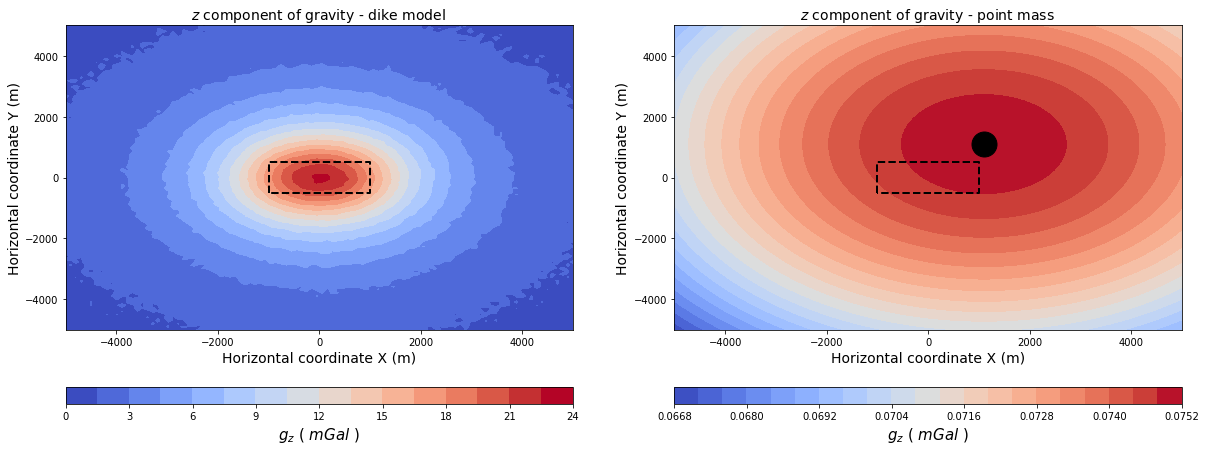

In [9]:
# -------------------- Ploting all results obtained so far --------------------:
plt.close('all')
plt.figure(figsize=(20,7))
fs = 14

#-------------------- Plot the data produced by the dike model: --------------------
plt.subplot(1, 2, 1)
plt.title('$z$ component of gravity - dike model ', fontsize = fs)
p1 = plt.contourf(X, Y, gzi, 20, cmap = plt.cm.coolwarm, vmin = np.min(gzi), vmax = np.max(gzi))
cbar1 = plt.colorbar(p1, aspect=30, fraction = 0.05, orientation="horizontal")
cbar1.set_label('$g_z $ ( $ mGal$ )',fontsize=15, rotation = 0)

# -------- plot the dike contour jointly with the color map ---------------------:
rectangle(contour_dike, style='--k', linewidth=2, fill= None, alpha=1., label=None)
plt.ylabel('Horizontal coordinate Y (m)', fontsize = fs)
plt.xlabel('Horizontal coordinate X (m)', fontsize = fs)

#-------------------- Plot the data produced by the deep point mass : --------------------
plt.subplot(1, 2, 2)
plt.title('$z$ component of gravity - point mass ', fontsize = fs)

# fixed levels based on the "real" data:
#p2 = plt.contourf(X, Y, gz_pred, 20, cmap = plt.cm.coolwarm, vmin = np.min(gzi), vmax = np.max(gzi))

# for the color map as a function of the data produced by the deep point mass:
p2 = plt.contourf(X, Y, gz_pred, 20, cmap = plt.cm.coolwarm, vmin = np.min(gz_pred), vmax = np.max(gz_pred))

#-------------------- Color bar specifications: --------------------
cbar2 = plt.colorbar(p2, aspect=30, fraction = 0.05, orientation="horizontal")
cbar2.set_label('$g_z $ ( $ mGal$ )',fontsize=15, rotation = 0)
#plt.clabel(p2, inline=1, fontsize=10) #(only work for contour command!!!!!!)

# -------- plot the dike contour into the contor map ---------------------:
rectangle(contour_dike, style='--k', linewidth=2, fill= None, alpha=1., label=None)

# -------- plot the point mass into the contor map ---------------------:
plt.scatter(xc, yc, s=rho, c='k', marker='.')

plt.ylabel('Horizontal coordinate Y (m)', fontsize = fs)
plt.xlabel('Horizontal coordinate X (m)', fontsize = fs)

#plt.savefig('figures/prism-gravity')

plt.show()

#  <center> 3D Plot of model and data in slice <center>

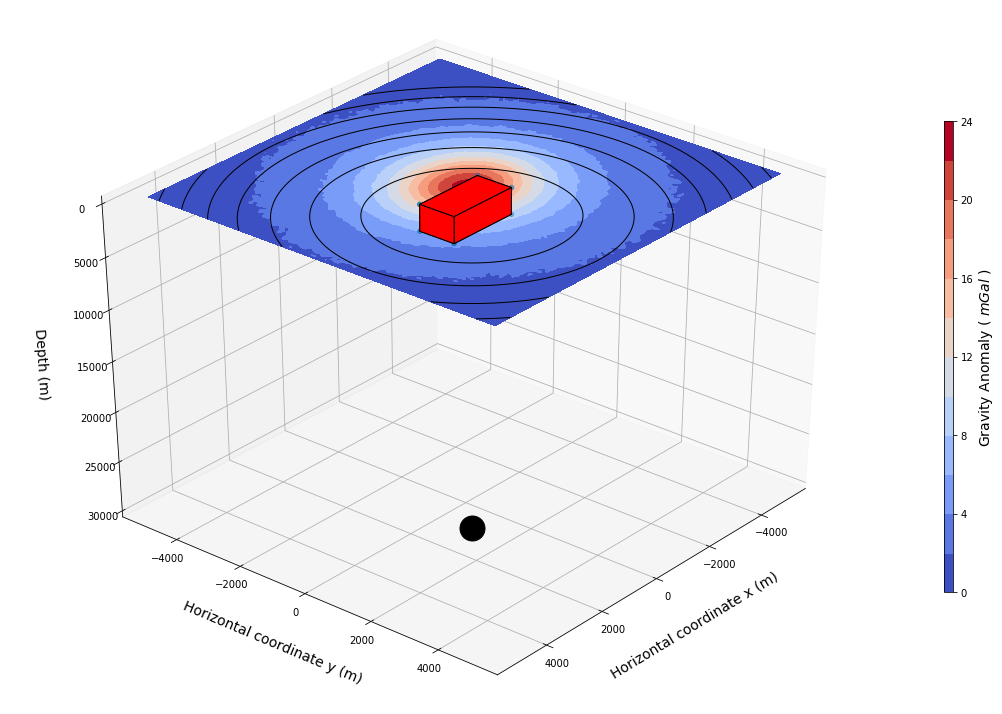

In [10]:
#py.rcParams['contour.negative_linestyle'] = 'dashed'
plt.close('all')
fig = plt.figure(figsize=(14,10))
ax = fig.gca(projection='3d') # 3D boxplot where the figure goes

# plot the dike and store it in pbox plotting object:
pbox = draw_prism(ax, dike3D)

# ----- define labels and limits of the plotbox:
pbox.set_xlabel('Horizontal coordinate x (m)', labelpad=20 ,fontsize=fs)
pbox.set_ylabel('Horizontal coordinate y (m)', labelpad=20 ,fontsize=fs)
pbox.set_zlim(-100,30000)
pbox.set_zlabel('Depth (m)',labelpad=20 ,fontsize=fs, rotation = 90)
pbox.view_init(35, 40)

# put z downward
pbox.invert_zaxis()

# add the deep point mass here:
pbox.scatter3D(xc, yc, zc, s= rho, c='k',marker = '.')

# ------------------- vertical gravitational atraction produced by the dike ------------------:
p1 = pbox.contourf(X, Y, gzi, 10, zdir='z', 
                offset=np.min(elev), cmap='coolwarm', vmin = np.min(gzi), vmax = np.max(gzi) )
cbar1 = fig.colorbar(p1, aspect = 50, fraction = 0.01, orientation="vertical")
cbar1.set_label('Gravity Anomaly ( $ mGal $ )',fontsize=fs, rotation = 90)

# ------------------- vertical gravitational atraction produced by the deep point mass--------:
p2 = pbox.contour(X, Y, gz_pred, 10, zdir='z', offset=np.min(elev) , colors='k', linewidths = 1, 
                  vmin=np.min(gz_pred), vmax=np.max(gz_pred) )

# ------------- Color bar specifications ---------------------------:
#cbar2 = fig.colorbar(p1, aspect = 50, fraction = 0.01, orientation="vertical")
#cbar2.set_label('Gravity Anomaly ( $ mGal $ )',fontsize=fs, rotation = 90)
#cbar2.add_lines(p2)

plt.clabel(p2, inline=1, fontsize=6)
plt.tight_layout(True)
plt.show()

### Conclusão: Este é o conceito de espaço nulo, que consiste em um conjunto específico de parâmetros do modelo utilizado (massas pontuais) que não produz qualquer alteração nos dados calculados. Isso significa que alguns dos parâmetros utilizados (zc muito profundo) para o teste não produzem qualquer alteração na gravidade. 


## Test #02: using the click method for creating a vertical line of masses:

In [11]:
# --------- import external package for interactive plotting ---------:
from modules.iplots import model_masses

In [12]:
#--------- define the plotting area for both (x,y) and (depth, density)---------:
area_xy = [min(coordx) , max(coordx), min(coordy), max(coordy)]

# based on the knowledge about the rock densities and common depth investigations!
area_rhoz = [2500.0, 3000.0, -1800.0, 10000.0]

print 'area_xy=', area_xy
print 'area_rhoz', area_rhoz

area_xy= [-5000.0, 5000.0, -5000.0, 5000.0]
area_rhoz [2500.0, 3000.0, -1800.0, 10000.0]


In [13]:
# call function for picking x,y,z,rho values from the plot areas:
%matplotlib tk
xc,yc,zc,rho = model_masses(area_xy, area_rhoz)

In [14]:
print len(xc), len(yc), len(zc), len(rho)

20 20 20 20


In [15]:
# ------- compute gravity data for all clicked point masses:
# Calculating the gravity attraction for all point masses:
gz = 0.0
# range of all masses:
for i in range( len(xc) ):
    source=[]
    source = [ xc[i], yc[i], zc[i], rho[i] ]  # calling one source a time:
    #print source
    gz_pred += sphere_gz(X, Y, elev[0], source) # sum the effect of all masses 

## <Center> Plot 2D contour map to check for the data-misfit. <center>

In [16]:
# Ploting the data to see if it's ok so far:
#%matplotlib inline
plt.close('all')
fig = plt.figure(figsize=(12,8))
fs = 14 # fontsize used in the labels

# plot the data in countor map:
plt.title('Data misfit', fontsize = fs)
p1 = plt.contourf(X, Y, gzi, 10, cmap = plt.cm.coolwarm, vmin=np.min(gzi), vmax=np.max(gzi))
p2 = plt.contour(X, Y, gz_pred, 10, colors='k', linewidths=1, vmin=np.min(gz), vmax=np.max(gz) )
plt.clabel(p2,fontsize=10)

# --- colorbar specifications-----:
cbar = fig.colorbar(p1, aspect=60, fraction = 0.1, orientation="horizontal")
cbar.set_label('$g_z$ ( $ mGal$ )',fontsize=15, rotation = 0)

# draw the edges of the dike for better vizualization:
rectangle(contour_dike, style='--k', linewidth=1, fill=None, alpha=1., label=None)

plt.ylabel('Horizontal coordinate Y (m)', fontsize = fs)
plt.xlabel('Horizontal coordinate X (m)', fontsize = fs)
plt.show()

#  <center> 3D Plot of model and data in slice <center>

In [17]:
#py.rcParams['contour.negative_linestyle'] = 'dashed'
plt.close('all')
%matplotlib tk
fig = plt.figure(figsize=(14,10))
ax = fig.gca(projection='3d') # 3D boxplot where the figure goes

# plot the dike and store it in pbox plotting object:
pbox = draw_prism(ax, dike3D)

# ----- define labels and limits of the plotbox:
pbox.set_xlabel('Horizontal coordinate x (m)', labelpad=20 ,fontsize=fs)
pbox.set_ylabel('Horizontal coordinate y (m)', labelpad=20 ,fontsize=fs)
pbox.set_zlim(-1800,10000)
pbox.set_zlabel('Depth (m)',labelpad=20 ,fontsize=fs, rotation = 90)
pbox.view_init(25, 40)

# put z downward
pbox.invert_zaxis()

# add the deep point mass here:
pbox.scatter3D(xc, yc, zc, s=rho , c='k', marker = '.')

# ------------------- vertical gravitational atraction produced by the dike ------------------:
p1 = pbox.contour(X, Y, gzi, 10, zdir='z', 
                offset=np.min(elev), cmap='coolwarm', vmin = np.min(gzi), vmax = np.max(gzi) )
cbar1 = fig.colorbar(p1, aspect = 50, fraction = 0.01, orientation="vertical")
cbar1.set_label('Gravity Anomaly ( $ mGal $ )',fontsize=fs, rotation = 90)

# ------------------- vertical gravitational atraction produced by the deep point mass--------:
p2 = pbox.contour(X, Y, gz_pred, 10, zdir='z', offset=np.min(elev) , colors='k', linewidths = 1, 
                  vmin=np.min(gz_pred), vmax=np.max(gz_pred) )

# ------------- Color bar specifications ---------------------------:
#cbar2 = fig.colorbar(p1, aspect = 50, fraction = 0.01, orientation="vertical")
#cbar2.set_label('Gravity Anomaly ( $ mGal $ )',fontsize=fs, rotation = 90)
#cbar2.add_lines(p2)

plt.clabel(p2, inline=1, fontsize=8)
#plt.tight_layout(True)
plt.show()

## Test #03: Physical property tests:
### A - high dense point of mass
### B - low dense point of mass

## Test #04: Behavior with many points of mass and one source of signal
### A - Outside the synthetic body
### B - Inside the synthetic body

## Test #05: Behavior with many sources of signal